### Libraries

In [2]:
import time
import shap
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from IPython.display import Image
from sklearn.tree import export_graphviz
from yellowbrick.model_selection import FeatureImportances

from imblearn.over_sampling import SMOTE, ADASYN
from skopt.space import Real, Categorical, Integer

from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib
# from plot_roc import *

from sklearn.metrics  import confusion_matrix, classification_report, roc_auc_score

warnings.filterwarnings('ignore')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [1]:
# from mlxtend.evaluate import cochrans_q
# from mlxtend.evaluate import mcnemar_table
# from mlxtend.evaluate import mcnemar

from statsmodels.stats.contingency_tables import mcnemar
from mlxtend.evaluate import mcnemar_table

### Read 

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

X_train_2 = pd.read_csv("train_2.csv", sep = ",")
X_test_2 = pd.read_csv("test_2.csv", sep = ",")

X_train_2.head()

Unnamed: 0 GR  RFV  H1RFV  H2RFV  CONICITY  H1LFV   PLY   LFV   RRO  \
0           2  A   46     14     23       4.5    4.3  56.0  13.0  0.77   
1           3  A   35     19      6       6.4   13.7  52.8  16.7  0.60   
2           4  A   34     12      2       8.0    4.8  49.5  11.5  0.50   
3           6  A   39     16     22       9.4    5.1  52.3   9.3  0.51   
4           7  C   55     27     35      12.1    9.0  51.3  14.7  0.79   

   CAPSPLICE  H1RRO  Y  
0       0.17   0.17  0  
1       0.26   0.19  0  
2       0.33   0.20  0  
3       0.28   0.15  0  
4       0.20   0.40  1

In [4]:
y_train = X_train_2[['Y']]
y_test = X_test_2[['Y']]


X_train = X_train_2[['CONICITY', 'RFV','RRO', 'H2RFV',
        'PLY','LFV', 'CAPSPLICE']]

X_test = X_test_2[['CONICITY', 'RFV','RRO', 'H2RFV',
        'PLY','LFV', 'CAPSPLICE']]

In [5]:
# X_train = X_train[['H2RFV', 'CONICITY', 'RRO']]#X_train[['H2RFV', 'CONICITY', 'RRO', 'RFV', 'H1RFV']]
# X_test = X_test[['H2RFV', 'CONICITY', 'RRO']]#X_test[['H2RFV', 'CONICITY', 'RRO', 'RFV', 'H1RFV']]

In [6]:
y_train.Y.value_counts()

1    45
0    36
Name: Y, dtype: int64

In [7]:
import lime.lime_tabular

## Predict

### Model

In [79]:
filename = './models/RF_best_GA_v2.sav'


RF_best = joblib.load(filename)
y_pred = RF_best.predict(X_test)

Text(0.5, 1.0, 'Random Forest feature importance')

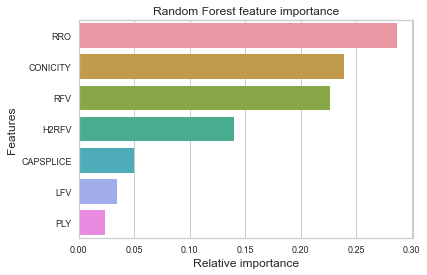

In [9]:
names_classifiers = [("Random Forest",RF_best)]
classifier = names_classifiers[0][1]
name = names_classifiers[0][0]
indices = np.argsort(classifier.feature_importances_)[::-1][:40]
g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title(name + " feature importance")

In [10]:
feature_names = X_train.columns.to_list()
class_names = ['C', 'NC']

In [11]:
explainer_l = lime.lime_tabular.LimeTabularExplainer(X_train.values ,feature_names = feature_names,class_names=class_names,
                                                    kernel_width=3)

In [26]:
j = 28
exp_lime = explainer_l.explain_instance(X_train.values[j], RF_best.predict_proba, num_features=7)
exp_lime.show_in_notebook(show_table=True)

In [55]:
j = 69
exp_lime = explainer_l.explain_instance(X_train.values[j], RF_best.predict_proba, num_features=7)
exp_lime.show_in_notebook(show_table=True)

In [13]:
X_train.values[j]

array([10.8 , 53.  ,  0.69, 16.  , 50.8 ,  9.  ,  0.28])

In [14]:
X_train.head(6)

CONICITY  RFV   RRO  H2RFV   PLY   LFV  CAPSPLICE
0       4.5   46  0.77     23  56.0  13.0       0.17
1       6.4   35  0.60      6  52.8  16.7       0.26
2       8.0   34  0.50      2  49.5  11.5       0.33
3       9.4   39  0.51     22  52.3   9.3       0.28
4      12.1   55  0.79     35  51.3  14.7       0.20
5      10.6   62  0.82     15  53.8  11.9       0.15

In [36]:
y_train[y_train['Y']==0]

Y
0   0
1   0
2   0
3   0
6   0
7   0
8   0
9   0
10  0
13  0
17  0
21  0
22  0
23  0
24  0
29  0
35  0
36  0
39  0
40  0
41  0
42  0
49  0
50  0
58  0
59  0
67  0
68  0
69  0
71  0
74  0
75  0
76  0
78  0
79  0
80  0

In [14]:
explainer = shap.TreeExplainer(RF_best)
shap_values = explainer.shap_values(X_train)

In [31]:
# indices = np.argsort(shap_values)[::-1]
# X_train.columns[indices]

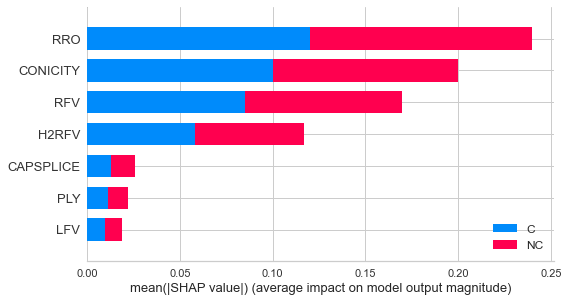

In [32]:
shap.summary_plot(shap_values, X_train, class_names= ['C', 'NC'], feature_names = X_train.columns.tolist())

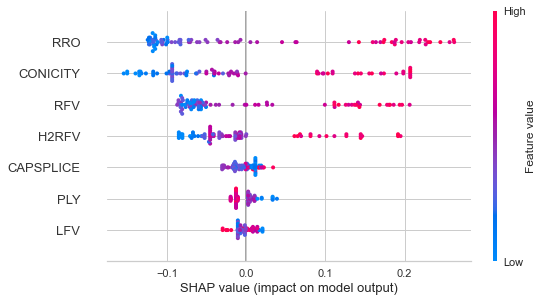

In [15]:
shap.summary_plot(shap_values[1], X_train, feature_names = X_train.columns.tolist(), class_names= ['C', 'NC'])

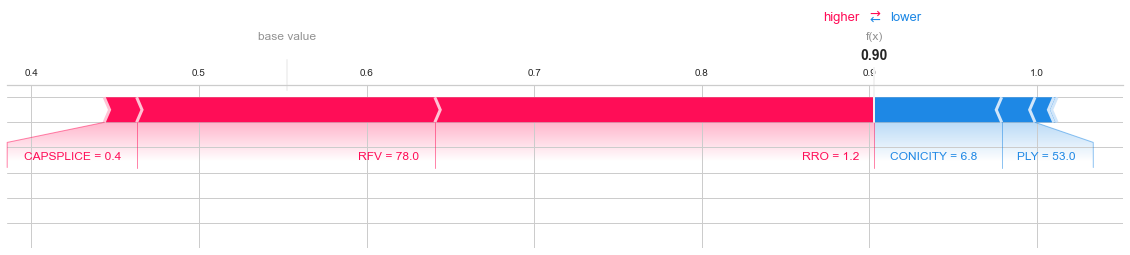

In [34]:
j=28
shap.force_plot(explainer.expected_value[1], shap_values[1][j,:], X_train.iloc[j,:], matplotlib=True)
# shap.force_plot(explainer.expected_value, shap_values[j,:], X_train.iloc[j,:], matplotlib=True)

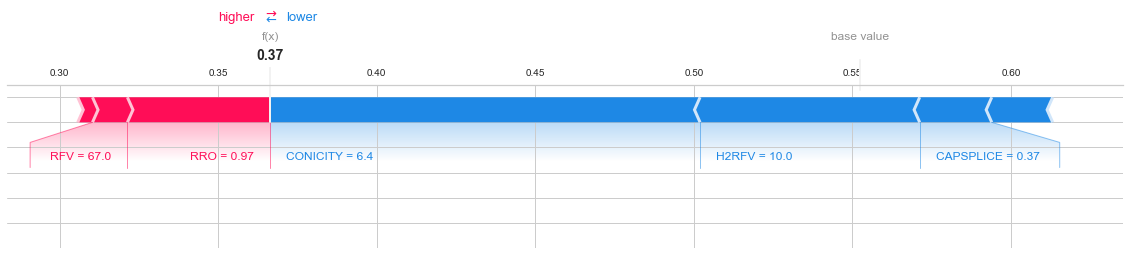

In [56]:
j=69
shap.force_plot(explainer.expected_value[1], shap_values[1][j,:], X_train.iloc[j,:], matplotlib=True)

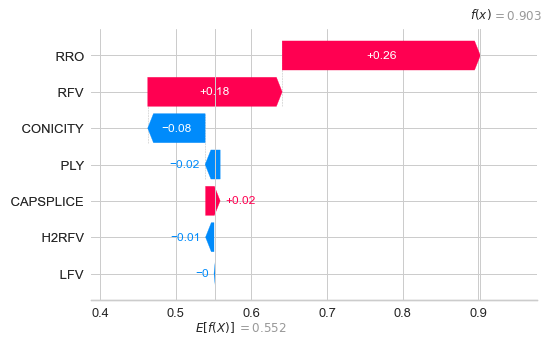

In [57]:
j=28
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[1], shap_values[1][j,:], X_train.iloc[j,:])

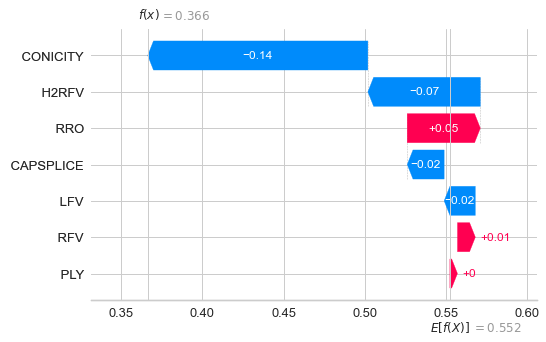

In [58]:
j=69
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[1], shap_values[1][j,:], X_train.iloc[j,:])

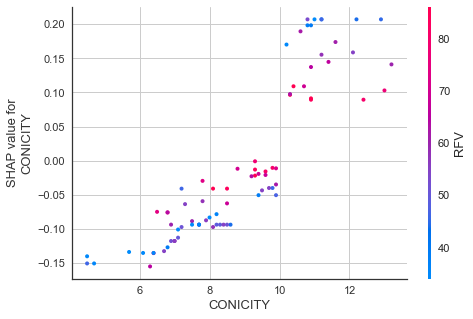

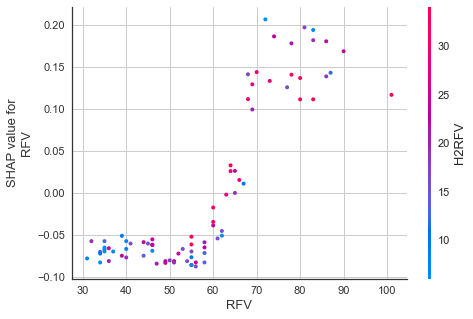

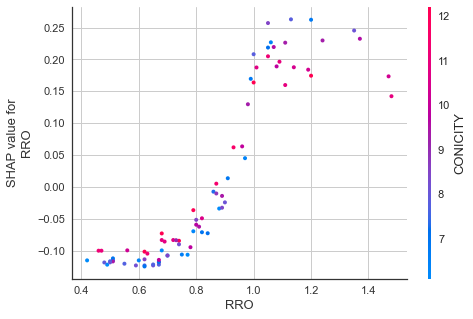

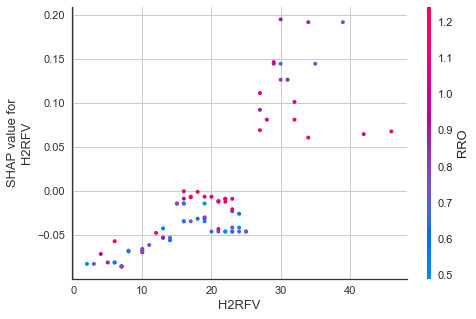

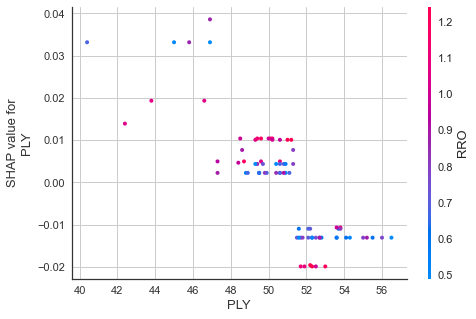

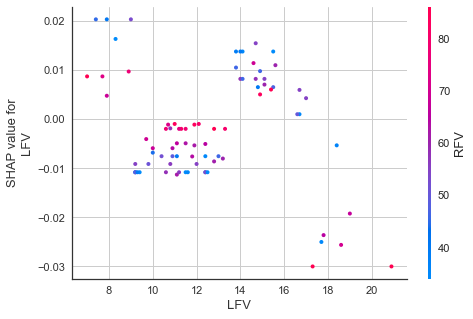

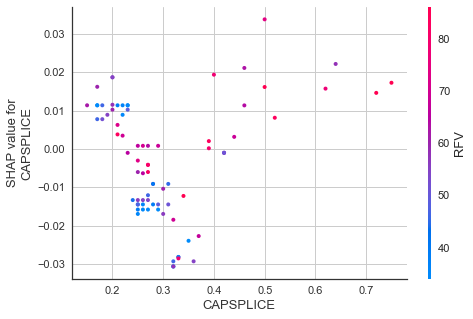

In [116]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values[1], X_train, display_features=X_train)

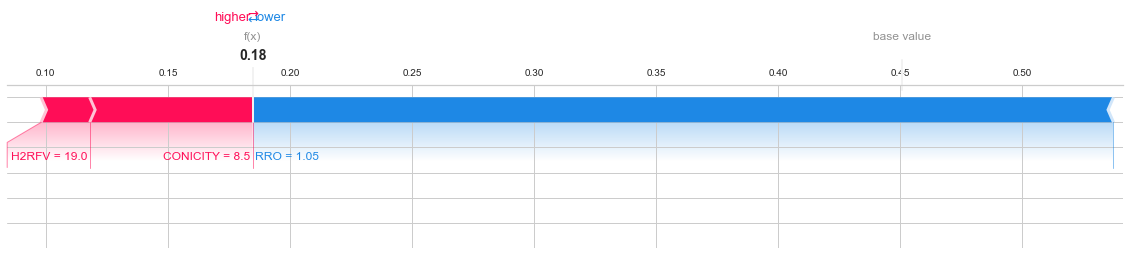

In [32]:
shap.force_plot(explainer.expected_value[0], shap_values[0][15,:], X_train.iloc[15,:], matplotlib=True)

In [30]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][:,:], X_train.iloc[:,:])

### Modelos

In [66]:
filename = './models/SVM_best_GA_v2.sav'


SVM_best = joblib.load(filename)

In [67]:
SVM_best

SVC(C=2.211716479149357, gamma=8.713113664242112, kernel='poly',
    probability=True, random_state=261)

In [68]:
filename = './models/LGBM_best_GA_v2.sav'


LGBM_best = joblib.load(filename)

In [69]:
filename = './models/GBM_best_GA_v2.sav'


GBM_best = joblib.load(filename)

In [70]:
filename = './models/MLP_best_GA_v2.sav'


MLP_best = joblib.load(filename)

In [90]:
LR_prob_train = pd.read_csv("predictRL2_train.csv", sep = ",")
LR_prob_test = pd.read_csv("predictRL2_test.csv", sep = ",")

In [91]:
y_pred_LR = LR_prob_test['x'].apply(lambda x: 1 if x>=0.41 else 0)

In [92]:
import matplotlib.pyplot as plt

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.94      0.97        16

    accuracy                           0.96        26
   macro avg       0.95      0.97      0.96        26
weighted avg       0.97      0.96      0.96        26

Specificity: 1.0
Gini:  0.9375
ROC AUC::  0.96875


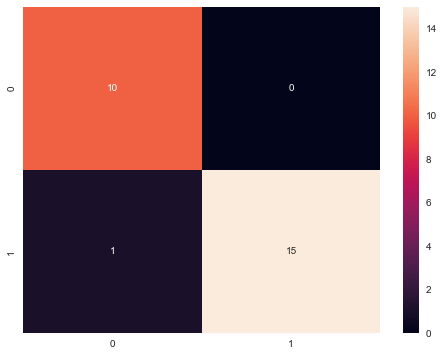

In [93]:
cm = confusion_matrix(y_test, y_pred_LR)
cm_df = pd.DataFrame(cm)                      
plt.figure(figsize=(8,6))  
sns.heatmap(cm_df, annot=True)
print("Classification Report: \n", classification_report(y_test, y_pred_LR))  

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print("Specificity:", TN/(TN+FP))
roc_auc = roc_auc_score(y_test, y_pred_LR, average=None)
gini = 2*roc_auc -1
print("Gini: ",gini)
print("ROC AUC:: ",roc_auc)

In [94]:
y_pred_LR = LR_prob_train['x'].apply(lambda x: 1 if x>=0.41 else 0)

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.96      0.98      0.97        45

    accuracy                           0.96        81
   macro avg       0.96      0.96      0.96        81
weighted avg       0.96      0.96      0.96        81

Specificity: 0.9444444444444444
Gini:  0.9222222222222223
ROC AUC::  0.9611111111111111


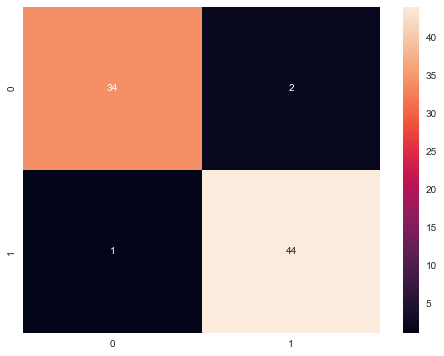

In [95]:
cm = confusion_matrix(y_train, y_pred_LR)
cm_df = pd.DataFrame(cm)                      
plt.figure(figsize=(8,6))  
sns.heatmap(cm_df, annot=True)
print("Classification Report: \n", classification_report(y_train, y_pred_LR))  

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print("Specificity:", TN/(TN+FP))

roc_auc = roc_auc_score(y_train, y_pred_LR, average=None)
gini = 2*roc_auc -1
print("Gini: ",gini)
print("ROC AUC:: ",roc_auc)

In [84]:
def fit_and_print(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm)                      
    plt.figure(figsize=(8,6))  
    sns.heatmap(cm_df, annot=True)
    print("Classification Report: \n", classification_report(y_test, y_pred))  


    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    print("Specificity:", TN/(TN+FP))


    roc_auc = roc_auc_score(y_test, y_pred, multi_class = 'ovr', average=None)
    gini = 2*roc_auc -1
    print("Gini: ",gini)
    print("ROC AUC: ",roc_auc)


#### RF

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        45

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81

Specificity: 1.0
Gini:  1.0
ROC AUC:  1.0


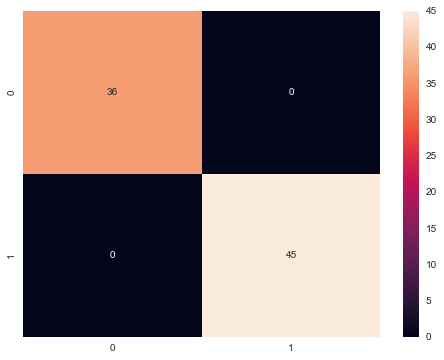

In [85]:
c = fit_and_print(RF_best, X_train, y_train)

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.88      0.93        16

    accuracy                           0.92        26
   macro avg       0.92      0.94      0.92        26
weighted avg       0.94      0.92      0.92        26

Specificity: 1.0
Gini:  0.875
ROC AUC:  0.9375


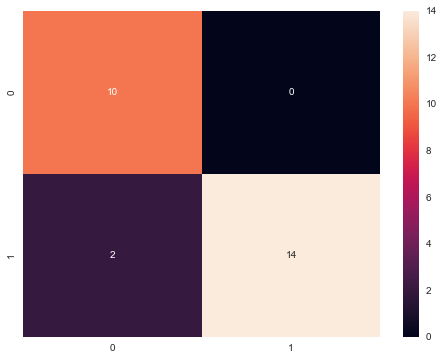

In [96]:
fit_and_print(RF_best, X_test, y_test)

#### SVM

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        45

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81

Specificity: 1.0
Gini:  1.0
ROC AUC:  1.0


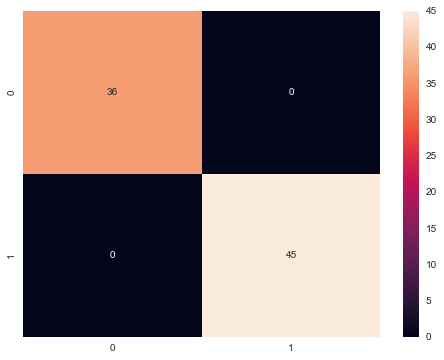

In [86]:
fit_and_print(SVM_best, X_train, y_train)

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.92      0.69      0.79        16

    accuracy                           0.77        26
   macro avg       0.78      0.79      0.77        26
weighted avg       0.81      0.77      0.77        26

Specificity: 0.9
Gini:  0.5875000000000001
ROC AUC:  0.7937500000000001


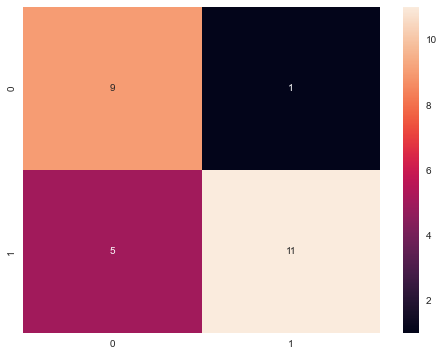

In [97]:
fit_and_print(SVM_best, X_test, y_test)

#### MLP

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.98      0.98      0.98        45

    accuracy                           0.98        81
   macro avg       0.97      0.97      0.97        81
weighted avg       0.98      0.98      0.98        81

Specificity: 0.9722222222222222
Gini:  0.9500000000000002
ROC AUC:  0.9750000000000001


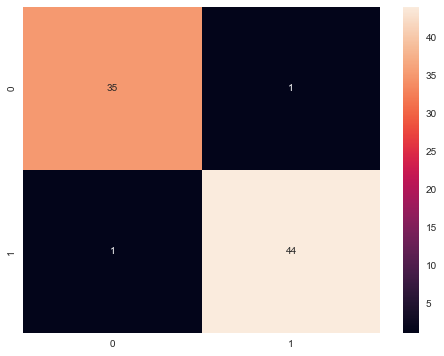

In [87]:
fit_and_print(MLP_best, X_train, y_train)

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.93      0.88      0.90        16

    accuracy                           0.88        26
   macro avg       0.88      0.89      0.88        26
weighted avg       0.89      0.88      0.89        26

Specificity: 0.9
Gini:  0.7749999999999999
ROC AUC:  0.8875


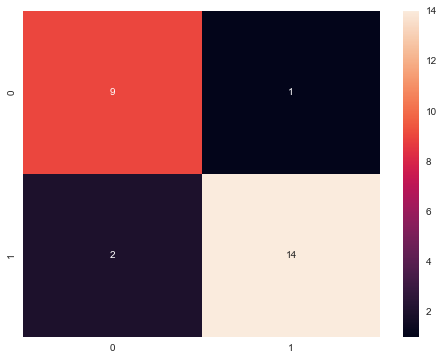

In [98]:
fit_and_print(MLP_best, X_test, y_test)

#### LGBM

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.96      1.00      0.98        45

    accuracy                           0.98        81
   macro avg       0.98      0.97      0.97        81
weighted avg       0.98      0.98      0.98        81

Specificity: 0.9444444444444444
Gini:  0.9444444444444444
ROC AUC:  0.9722222222222222


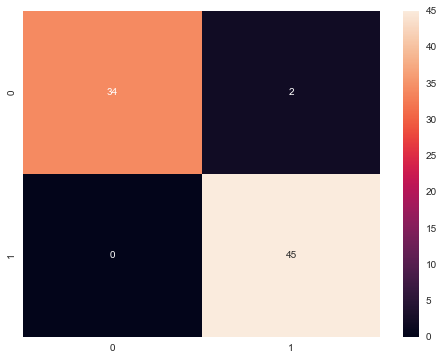

In [88]:
fit_and_print(LGBM_best, X_train, y_train)

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.81      0.90        16

    accuracy                           0.88        26
   macro avg       0.88      0.91      0.88        26
weighted avg       0.91      0.88      0.89        26

Specificity: 1.0
Gini:  0.8125
ROC AUC:  0.90625


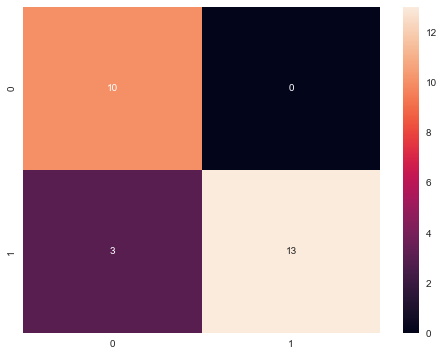

In [99]:
fit_and_print(LGBM_best, X_test, y_test)

#### GBM

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.98      1.00      0.99        45

    accuracy                           0.99        81
   macro avg       0.99      0.99      0.99        81
weighted avg       0.99      0.99      0.99        81

Specificity: 0.9722222222222222
Gini:  0.9722222222222221
ROC AUC:  0.986111111111111


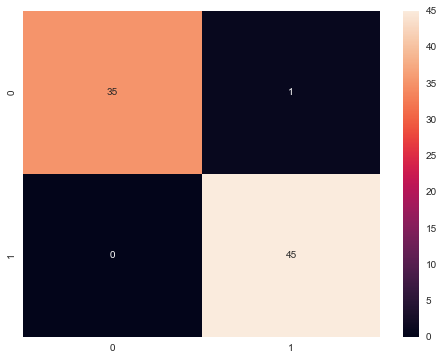

In [89]:
fit_and_print(GBM_best, X_train, y_train)

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.94      0.94      0.94        16

    accuracy                           0.92        26
   macro avg       0.92      0.92      0.92        26
weighted avg       0.92      0.92      0.92        26

Specificity: 0.9
Gini:  0.8375000000000001
ROC AUC:  0.9187500000000001


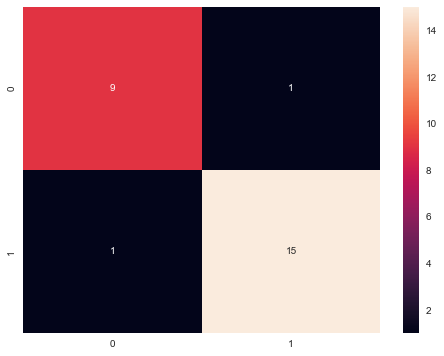

In [100]:
fit_and_print(GBM_best, X_test, y_test)

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [40]:
classifiers = [RF_best, GBM_best, LGBM_best, SVM_best, MLP_best]

In [41]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    yproba = cls.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [42]:
result_table

fpr  \
classifiers                                                                     
RandomForestClassifier                                   [0.0, 0.0, 0.0, 1.0]   
GradientBoostingClassifier                     [0.0, 0.0, 0.0, 0.5, 0.5, 1.0]   
LGBMClassifier              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...   
SVC                         [0.0, 0.0, 0.0, 0.1, 0.1, 0.2, 0.2, 0.6, 0.6, ...   
MLPClassifier                        [0.0, 0.0, 0.0, 0.1, 0.1, 0.2, 0.2, 1.0]   

                                                                          tpr  \
classifiers                                                                     
RandomForestClassifier                                [0.0, 0.0625, 1.0, 1.0]   
GradientBoostingClassifier            [0.0, 0.0625, 0.9375, 0.9375, 1.0, 1.0]   
LGBMClassifier              [0.0, 0.0625, 0.1875, 0.375, 0.625, 0.75, 0.81...   
SVC                         [0.0, 0.125, 0.6875, 0.6875, 0.75, 0.75, 0.875...   
MLPClassifier               [0.0, 0.0625, 0.75, 0.75, 0.9375, 0.9375, 1.0,...   

                                auc  
classifiers                          
RandomForestClassifier          1.0  
GradientBoostingClassifier  0.96875  
LGBMClassifier                0.975  
SVC                         0.88125  
MLPClassifier               0.96875

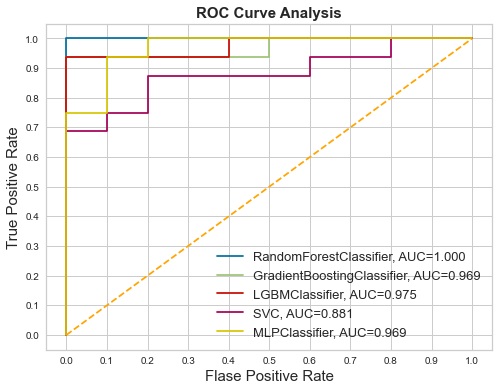

In [43]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
def plot_roc(model, l):
    #fit logistic regression model and plot ROC curve
    if l=="LR":
        fpr, tpr, _ = roc_curve(y_test, model)
        auc = round(roc_auc_score(y_test, model), 4)
        plt.plot(fpr,tpr,label=l+ " , AUC="+str(auc))
    else:
        # model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        auc = round(roc_auc_score(y_test, y_pred), 4)
        plt.plot(fpr,tpr,label=l+ " , AUC="+str(auc))

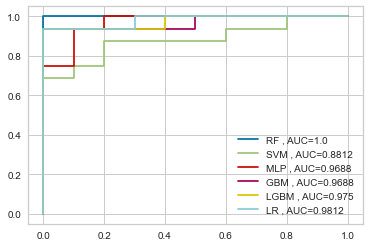

In [ ]:
labels = ['RF', 'SVM', "MLP", "GBM", "LGBM", "LR"]
models = [RF_best, SVM_best, MLP_best, GBM_best, LGBM_best, LR_prob_test['x']]

#set up plotting area
plt.figure(0).clf()

for i, j in enumerate(models):

    plot_roc(j, labels[i])


#add legend
plt.legend()

In [ ]:
from yellowbrick.classifier import ROCAUC

In [ ]:
def fit_and_print(model, X_test):
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm)                      
    plt.figure(figsize=(8,6))  
    sns.heatmap(cm_df, annot=True)
    print("Classification Report: \n", classification_report(y_test, y_pred))  


    roc_auc = roc_auc_score(y_test, y_pred, average=None)
    gini = 2*roc_auc -1
    print("Gini: ",gini)
    print("ROC AUC:: ",roc_auc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.88      0.93        16

    accuracy                           0.92        26
   macro avg       0.92      0.94      0.92        26
weighted avg       0.94      0.92      0.92        26

Gini:  0.875
ROC AUC::  0.9375


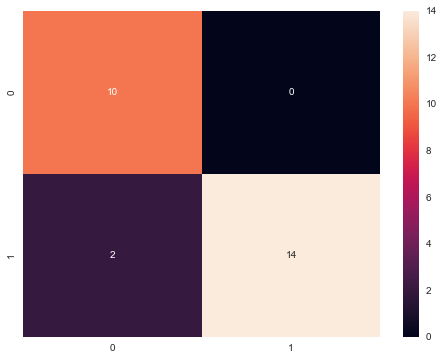

In [ ]:
fit_and_print(RF_best, X_test)

### Teste Mcnemar

In [177]:
def test_hip(table):
    # calculate mcnemar test
    result = mcnemar(table, exact=True,  correction=True)
    # summarize the finding
    print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
    # interpret the p-value
    alpha = 0.05
    if result.pvalue > alpha:
        print('Same proportions of errors (fail to reject H0)')
    else:
        print('Different proportions of errors (reject H0)')


def test_hip2(table):
    result = mcnemar(table, exact=True, correction=True)
    p = result.pvalue
    return np.float(p) 

In [45]:
classifiers = [RF_best, GBM_best, LGBM_best, SVM_best, MLP_best]
result_test = pd.DataFrame(columns=['RF', 'GBM', 'LGBM', 'SVM', 'MLP', 'LR'])

In [49]:
result_test['RF'] =  RF_best.predict(X_test)
result_test['GBM'] =  GBM_best.predict(X_test)
result_test['LGBM'] =  LGBM_best.predict(X_test)
result_test['SVM'] =  SVM_best.predict(X_test)
result_test['MLP'] =  MLP_best.predict(X_test)
result_test['LR'] =  LR_prob_test['x'].apply(lambda x: 1 if x>=0.41 else 0)

In [51]:
result_test['Y'] = y_test

In [159]:
table1 = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.RF, 
                   y_model2=result_test.GBM)

table2 = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.RF, 
                   y_model2=result_test.LGBM)

table3 = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.RF, 
                   y_model2=result_test.SVM)


table4 = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.RF, 
                   y_model2=result_test.MLP)


table5 = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.RF, 
                   y_model2=result_test.LR)

table_RF = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.RF, 
                   y_model2=result_test.RF)

table_GBM = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.GBM, 
                   y_model2=result_test.GBM)

table_LGBM = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.LGBM, 
                   y_model2=result_test.LGBM)

table_SVM = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.SVM, 
                   y_model2=result_test.SVM)

table_MLP = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.MLP, 
                   y_model2=result_test.MLP)

table_LR = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.LR, 
                   y_model2=result_test.LR)


In [160]:
table6 = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.LGBM, 
                   y_model2=result_test.GBM)

table7 = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.LGBM, 
                   y_model2=result_test.SVM)


table8 = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.LGBM, 
                   y_model2=result_test.MLP)


table9 = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.LGBM, 
                   y_model2=result_test.LR)

In [161]:
table10 = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.SVM, 
                   y_model2=result_test.GBM)

table11 = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.SVM, 
                   y_model2=result_test.MLP)


table12 = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.SVM, 
                   y_model2=result_test.LR)

In [162]:
table13 = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.MLP, 
                   y_model2=result_test.LR)

table14 = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.MLP, 
                   y_model2=result_test.GBM)

table15 = mcnemar_table(y_target=result_test.Y, 
                   y_model1=result_test.LR, 
                   y_model2=result_test.GBM)

In [163]:
print('RF vs GBM')
test_hip(table1)
print('RF vs LGBM')
test_hip(table2)
print('RF vs SVM')
test_hip(table3)
print('RF vs MLP')
test_hip(table4)
print('RF vs LR')
test_hip(table5)
print('LGBM vs GBM')
test_hip(table6)
print('LGBM vs SVM')
test_hip(table7)
print('LGBM vs MLP')
test_hip(table8)
print('LGBM vs LR')
test_hip(table9)
print('SVM vs GBM')
test_hip(table10)
print('SVM vs MLP')
test_hip(table11)
print('SVM vs LR')
test_hip(table12)
print('MLP vs LR')
test_hip(table13)
print('MLP vs GBM')
test_hip(table14)
print('LR vs GBM')
test_hip(table15)

RF vs GBM
statistic=1.000, p-value=1.000
Same proportions of errors (fail to reject H0)
RF vs LGBM
statistic=0.000, p-value=1.000
Same proportions of errors (fail to reject H0)
RF vs SVM
statistic=1.000, p-value=0.219
Same proportions of errors (fail to reject H0)
RF vs MLP
statistic=1.000, p-value=1.000
Same proportions of errors (fail to reject H0)
RF vs LR
statistic=0.000, p-value=1.000
Same proportions of errors (fail to reject H0)
LGBM vs GBM
statistic=1.000, p-value=1.000
Same proportions of errors (fail to reject H0)
LGBM vs SVM
statistic=2.000, p-value=0.453
Same proportions of errors (fail to reject H0)
LGBM vs MLP
statistic=2.000, p-value=1.000
Same proportions of errors (fail to reject H0)
LGBM vs LR
statistic=0.000, p-value=0.500
Same proportions of errors (fail to reject H0)
SVM vs GBM
statistic=1.000, p-value=0.219
Same proportions of errors (fail to reject H0)
SVM vs MLP
statistic=1.000, p-value=0.375
Same proportions of errors (fail to reject H0)
SVM vs LR
statistic=1.0

In [96]:
rf_list = list()
tb_rf = [table1, table2, table3, table4, table5]
for i in tb_rf: 
    rf_list.append(test_hip2(i))

lgbm_list = [0]
tb_lgbm = [table6, table7, table8, table9]
for i in tb_lgbm: 
    lgbm_list.append(test_hip2(i))

svm_list = [0, 0]
tb_svm = [table10, table11, table12]
for i in tb_svm: 
    svm_list.append(test_hip2(i))

mlp_list = [0, 0, 0]
tb_mlp = [table13, table14]
for i in tb_mlp: 
    mlp_list.append(test_hip2(i))

lr_list = [0, 0, 0, 0]
tb_lr = [table15]
for i in tb_lr: 
    lr_list.append(test_hip2(i))


In [97]:
result_p1 = pd.DataFrame()
result_p2 = pd.DataFrame()
result_p3 = pd.DataFrame()
result_p4 = pd.DataFrame()
result_p5 = pd.DataFrame()

In [98]:
result_p2['LGBM'] =  lgbm_list
result_p3['SVM'] =  svm_list
result_p4['MLP'] =  mlp_list
result_p5['LR'] =  lr_list

In [99]:
result_p1['RF'] =  rf_list

In [100]:
result_p1.T

0    1        2    3    4
RF  1.0  1.0  0.21875  1.0  1.0

In [101]:
result_p2.T

0    1         2    3    4
LGBM  0.0  1.0  0.453125  1.0  0.5

In [ ]:
index_list = ['GBM', 'LGBM', 'SVM', 'MLP', 'LR']

In [124]:
data_test = pd.concat([result_p1, result_p2, result_p3, result_p4, result_p5], axis=1)#.fillna(0)

In [125]:
# data_test.index = ['GBM', 'LGBM', 'SVM', 'MLP', 'LR']

In [198]:
data_test = pd.DataFrame(columns=['RF', 'GBM', 'LGBM', 'SVM', 'MLP', 'LR'])
data_test[' '] = ['RF', 'GBM', 'LGBM', 'SVM', 'MLP', 'LR']
data_test = data_test.set_index(' ')

In [199]:
data_test['RF']['GBM'] = test_hip2(table1)
data_test['RF']['LGBM'] = test_hip2(table2)
data_test['RF']['SVM'] = test_hip2(table3)
data_test['RF']['MLP'] = test_hip2(table4)
data_test['RF']['LR'] = test_hip2(table5)
data_test['RF']['RF'] = test_hip2(table_RF)


data_test['LGBM']['RF'] = test_hip2(table2)
data_test['LGBM']['GBM'] = test_hip2(table6)
data_test['LGBM']['SVM'] = test_hip2(table7)
data_test['LGBM']['MLP'] = test_hip2(table8)
data_test['LGBM']['LR'] = test_hip2(table9)
data_test['LGBM']['LGBM'] = test_hip2(table_LGBM)


data_test['SVM']['RF'] = test_hip2(table3)
data_test['SVM']['GBM'] = test_hip2(table10)
data_test['SVM']['MLP'] = test_hip2(table11)
data_test['SVM']['LR'] = test_hip2(table12)
data_test['SVM']['LGBM'] = test_hip2(table7)
data_test['SVM']['SVM'] = test_hip2(table_SVM)


data_test['MLP']['LR'] = test_hip2(table13)
data_test['MLP']['GBM'] = test_hip2(table14)
data_test['MLP']['LGBM'] = test_hip2(table8)
data_test['MLP']['RF'] = test_hip2(table4)
data_test['MLP']['SVM'] = test_hip2(table11)
data_test['MLP']['MLP'] = test_hip2(table_MLP)


data_test['LR']['RF'] = test_hip2(table5)
data_test['LR']['GBM'] = test_hip2(table15)
data_test['LR']['LGBM'] = test_hip2(table9)
data_test['LR']['SVM'] = test_hip2(table12)
data_test['LR']['MLP'] = test_hip2(table13)
data_test['LR']['LR'] = test_hip2(table_LR)


data_test['GBM']['RF'] = test_hip2(table1)
data_test['GBM']['LGBM'] = test_hip2(table6)
data_test['GBM']['SVM'] = test_hip2(table10)
data_test['GBM']['MLP'] = test_hip2(table14)
data_test['GBM']['LR'] = test_hip2(table15)
data_test['GBM']['GBM'] = test_hip2(table_GBM)

In [200]:
data_test

RF      GBM      LGBM       SVM    MLP     LR
                                                        
RF        1.0      1.0       1.0   0.21875    1.0    1.0
GBM       1.0      1.0       1.0   0.21875    1.0    1.0
LGBM      1.0      1.0       1.0  0.453125    1.0    0.5
SVM   0.21875  0.21875  0.453125       1.0  0.375  0.125
MLP       1.0      1.0       1.0     0.375    1.0  0.625
LR        1.0      1.0       0.5     0.125  0.625    1.0

In [201]:
c = ['RF', 'GBM', 'LGBM', 'SVM', 'MLP', 'LR']

for i in c:
    data_test[i] = data_test[i].astype(np.float)

In [202]:
# data_test = data_test.fillna(0)

In [203]:
data_test.dtypes

RF      float64
GBM     float64
LGBM    float64
SVM     float64
MLP     float64
LR      float64
dtype: object

In [204]:
mask = np.triu(np.ones_like(data_test, dtype=bool))

In [205]:
mask

array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

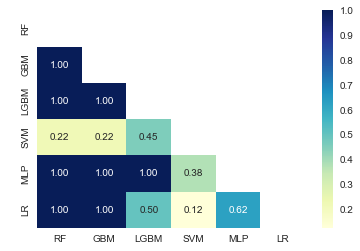

In [207]:
g = sns.heatmap(data_test ,cmap="YlGnBu",annot=True, mask = mask, fmt=".2f")#mask = mask 

### Optimization

In [30]:
from scipy.optimize import linprog
import numpy as np

In [31]:
sup = np.log(0.41/(1-0.41)) + 47.08
sup

46.71603462279859

In [32]:
sup - 7.6*3.01

23.84003462279859

In [33]:
46.72/0.36 - 25

104.77777777777777

In [34]:
46.72/3.01 - 9.9

5.621594684385382

In [35]:
46.72/17.91 - 0.97

1.6385985482970409

In [36]:
c = [-17.91, -3.01, -0.36] #17.91 x_1 + 3.01 x_2 + 0.36 x_3
# c = [17.91, 3.01, 0.36] 
A = [[17.91, 3.01, 0.36]] 
# A = [[17.91, 3.01, 0.36], [17.91/0.36, 3.01/0.36, 0], [17.91/3.01, 0, 0.36/3.01], [0, 3.01/17.91,  0.36/17.91]]
# b = [46.72, 104.78, 5.62, 1.64]
b = [46.72]
# x1_bounds = (0.67, 0.78)
# x2_bounds = (7.6, 8.33)
# x3_bounds = (16.00, 21.25)

# x1_bounds = (0.67, 0.97)
# x2_bounds = (7.6, 9.90)
# x3_bounds = (16.00, 25.00)


x1_bounds = (0.78, 0.97)
x2_bounds = (8.33, 9.90)
x3_bounds = (21.25, 25.00)


# x1_bounds = (0.42, 1.48)
# x2_bounds = (4.5, 13.20)
# x3_bounds = (2, 46.00)

# x1_bounds = (0.88, 0.97)
# x2_bounds = (9.7, 9.9)
# x3_bounds = (24, 25)

res = linprog(c, A_ub=A, b_ub=b, bounds=[x1_bounds, x2_bounds, x3_bounds], method='highs')
res.fun

-46.72

In [37]:
res.fun

-46.72

In [38]:
res.x

array([ 0.78      ,  8.33      , 21.32472222])

In [39]:
-np.dot(c, res.x)

46.72

In [40]:
X_train.head()

CONICITY  RFV   RRO  H2RFV   PLY   LFV  CAPSPLICE
0       4.5   46  0.77     23  56.0  13.0       0.17
1       6.4   35  0.60      6  52.8  16.7       0.26
2       8.0   34  0.50      2  49.5  11.5       0.33
3       9.4   39  0.51     22  52.3   9.3       0.28
4      12.1   55  0.79     35  51.3  14.7       0.20

In [41]:
import statistics

In [42]:
X_train_3 = X_train[['RRO', 'CONICITY', 'H2RFV']].copy()
X_test_3 = X_test[['RRO', 'CONICITY', 'H2RFV']].copy()

X_train_3['Y']= y_train
X_test_3['Y']= y_test

In [43]:
X_train_3['f_x']=  17.91*X_train_3['RRO'] +3.01*X_train_3['CONICITY'] +0.36*X_train_3['H2RFV'] 

In [44]:
X_train_3['f_x_2']= X_train_3['f_x'] - 47.08

In [45]:
X_train_3['f_x3']=  np.exp(-47.08 + 17.91*X_train_3['RRO'] +3.01*X_train_3['CONICITY'] +0.36*X_train_3['H2RFV'])/(1+np.exp(-47.08 + 17.91*X_train_3['RRO'] +3.01*X_train_3['CONICITY'] +0.36*X_train_3['H2RFV']))

In [46]:
X_train_3['f_x3']= X_train_3['f_x3']*1000

In [47]:
X_train_3.head(2)

RRO  CONICITY  H2RFV  Y      f_x    f_x_2      f_x3
0  0.77       4.5     23  0  35.6157 -11.4643  0.010498
1  0.60       6.4      6  0  32.1700 -14.9100  0.000335

In [48]:
# a = 0.67 #0.78
# b = 9.62 #8.33
# c = 16 # 21.25

a = 0.78
b = 8.33
c = 21.32


In [49]:
X_train_3['Y2']= 0

# X_train_3.loc[(X_train_3['RRO'] > 0.78)&(X_train_3['CONICITY'] > 8.33)&(X_train_3['H2RFV'] > 21.25), 'Y2']=1
X_train_3.loc[(X_train_3['RRO'] > a)&(X_train_3['CONICITY'] > b), 'Y2']=1
X_train_3.loc[(X_train_3['RRO'] > a)&(X_train_3['H2RFV'] > c), 'Y2']=1
X_train_3.loc[(X_train_3['CONICITY'] > b)&(X_train_3['H2RFV'] > c), 'Y2']=1
X_train_3.loc[(X_train_3['RRO'] > a)&(X_train_3['CONICITY'] > b)&(X_train_3['H2RFV'] > c), 'Y2']=1

In [50]:
X_test_3['Y2']= 0

# X_test_3.loc[(X_test_3['RRO'] > 0.78)&(X_test_3['CONICITY'] > 8.33)&(X_test_3['H2RFV'] > 21.25), 'Y2']=1
X_test_3.loc[(X_test_3['RRO'] > a)&(X_test_3['CONICITY'] > b), 'Y2']=1
X_test_3.loc[(X_test_3['RRO'] > a)&(X_test_3['H2RFV'] > c), 'Y2']=1
X_test_3.loc[(X_test_3['CONICITY'] > b)&(X_test_3['H2RFV'] > c), 'Y2']=1
X_test_3.loc[(X_test_3['RRO'] > a)&(X_test_3['CONICITY'] > b)&(X_test_3['H2RFV'] > c), 'Y2']=1

In [51]:
X_train_3.loc[47]#.head(50)

RRO           0.560000
CONICITY     10.200000
H2RFV        13.000000
Y             1.000000
f_x          45.411600
f_x_2        -1.668400
f_x3        158.637617
Y2            0.000000
Name: 47, dtype: float64

In [52]:
X_train_3.head(5)

RRO  CONICITY  H2RFV  Y      f_x    f_x_2        f_x3  Y2
0  0.77       4.5     23  0  35.6157 -11.4643    0.010498   0
1  0.60       6.4      6  0  32.1700 -14.9100    0.000335   0
2  0.50       8.0      2  0  33.7550 -13.3250    0.001633   0
3  0.51       9.4     22  0  45.3481  -1.7319  150.344710   1
4  0.79      12.1     35  1  63.1699  16.0899  999.999897   1

In [53]:
import plotly.express as px
import matplotlib.pyplot as plt

In [54]:
# fig = px.scatter_3d(X_train_3, x="H2RFV", y="CONICITY",z="RRO", color="Y")# symbol = "Y", color= "f_x3")
# fig.show()

In [55]:
pd.crosstab(X_train_3.Y, X_train_3.Y2, margins=True)

Y2    0   1  All
Y               
0    30   6   36
1     8  37   45
All  38  43   81

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        36
           1       0.86      0.82      0.84        45

    accuracy                           0.83        81
   macro avg       0.82      0.83      0.83        81
weighted avg       0.83      0.83      0.83        81

Gini:  0.6555555555555557
ROC AUC::  0.8277777777777778


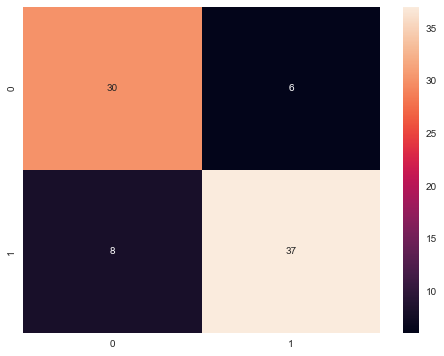

In [56]:
cm = confusion_matrix(X_train_3.Y, X_train_3.Y2)
cm_df = pd.DataFrame(cm)                      
plt.figure(figsize=(8,6))  
sns.heatmap(cm_df, annot=True)
print("Classification Report: \n", classification_report(X_train_3.Y, X_train_3.Y2))  


roc_auc = roc_auc_score(X_train_3.Y, X_train_3.Y2, average=None)
gini = 2*roc_auc -1
print("Gini: ",gini)
print("ROC AUC:: ",roc_auc)

In [57]:
pd.crosstab(y_test.Y, X_test_3.Y2, margins=True)

Y2    0   1  All
Y               
0     8   2   10
1     4  12   16
All  12  14   26

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.86      0.75      0.80        16

    accuracy                           0.77        26
   macro avg       0.76      0.78      0.76        26
weighted avg       0.78      0.77      0.77        26

Gini:  0.5500000000000003
ROC AUC::  0.7750000000000001


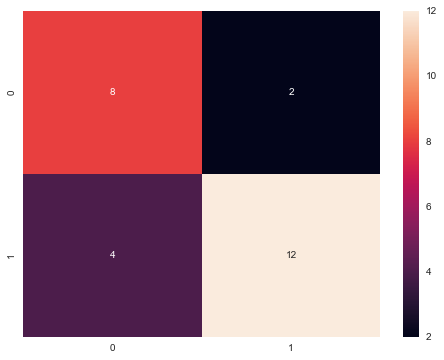

In [58]:
cm = confusion_matrix(X_test_3.Y, X_test_3.Y2)
cm_df = pd.DataFrame(cm)                      
plt.figure(figsize=(8,6))  
sns.heatmap(cm_df, annot=True)
print("Classification Report: \n", classification_report(X_test_3.Y, X_test_3.Y2))  


roc_auc = roc_auc_score(X_test_3.Y, X_test_3.Y2, average=None)
gini = 2*roc_auc -1
print("Gini: ",gini)
print("ROC AUC:: ",roc_auc)

In [59]:
X_train_3.head()

RRO  CONICITY  H2RFV  Y      f_x    f_x_2        f_x3  Y2
0  0.77       4.5     23  0  35.6157 -11.4643    0.010498   0
1  0.60       6.4      6  0  32.1700 -14.9100    0.000335   0
2  0.50       8.0      2  0  33.7550 -13.3250    0.001633   0
3  0.51       9.4     22  0  45.3481  -1.7319  150.344710   1
4  0.79      12.1     35  1  63.1699  16.0899  999.999897   1

In [60]:
X_train_3.iloc[:, 0]

0     0.77
1     0.60
2     0.50
3     0.51
4     0.79
      ... 
76    0.68
77    0.86
78    0.81
79    0.70
80    0.51
Name: RRO, Length: 81, dtype: float64

In [61]:
X_train_3[X_train_3.Y==1].iloc[:, 0]

4     0.79
5     0.82
11    0.69
12    0.91
14    0.99
15    1.05
16    1.13
18    1.11
19    1.05
20    1.07
25    1.01
26    0.46
27    0.68
28    1.20
30    1.00
31    1.00
32    1.06
33    1.19
34    0.89
37    1.08
38    1.35
43    0.87
44    0.87
45    0.62
46    0.96
47    0.56
48    1.48
51    1.14
52    0.74
53    1.05
54    0.73
55    1.24
56    0.68
57    1.20
60    0.72
61    1.47
62    0.93
63    0.98
64    0.63
65    1.09
66    0.47
70    1.11
72    0.80
73    1.37
77    0.86
Name: RRO, dtype: float64

In [62]:
statistics.quantiles(X_train_3[X_train_3.Y==0]['RRO'], n=10)

[0.497, 0.51, 0.602, 0.644, 0.67, 0.7, 0.768, 0.806, 0.883]

In [63]:
statistics.quantiles(X_train_3[X_train_3.Y==0]['H2RFV'], n=10)

[5.7, 7.0, 10.0, 13.0, 16.0, 19.0, 20.9, 22.6, 24.0]

In [64]:
statistics.quantiles(X_train_3[X_train_3.Y==0]['CONICITY'], n=10)

[5.4, 6.4, 6.909999999999999, 7.1, 7.6, 7.92, 8.2, 8.559999999999999, 9.73]

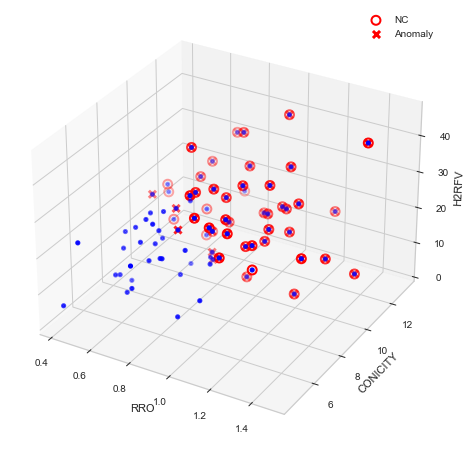

In [65]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("H2RFV")
ax.set_ylabel("CONICITY")
ax.set_xlabel("RRO")
# Plot the reduced dimensionality data points
ax.scatter(X_train_3.iloc[:, 0], X_train_3.iloc[:, 1], zs=X_train_3.iloc[:, 2], s=10, lw=2, c='blue')

# Plot circles around the predicted outliers
ax.scatter(X_train_3[X_train_3.Y==1].iloc[:, 0], X_train_3[X_train_3.Y==1].iloc[:, 1], zs=X_train_3[X_train_3.Y==1].iloc[:, 2], 
           lw=2, facecolors="none", edgecolors="red", s=80, label="NC")

# Plot x's for the ground truth outliers
ax.scatter(X_train_3[X_train_3.Y2==1].iloc[:, 0], X_train_3[X_train_3.Y2==1].iloc[:, 1], zs=X_train_3[X_train_3.Y2==1].iloc[:, 2],  
           lw=3, s=50, marker="x", c="red", label="Anomaly")
ax.legend()

In [23]:
X_train_3.RRO.min()

0.42

In [ ]:

x1_bounds = (0.78, 0.97)
x2_bounds = (8.33, 9.90)
x3_bounds = (21.25, 25.00)

In [101]:
from scipy.optimize import linprog
 
# Objective function's Coefficient matrix
obj = [-0.3555, -3.0103, -17.9134]
 
# Constraints Left side x and y Coefficient matrix
lhs_ineq = [[0.3555, 3.0103, 17.9134],   # 0x1 + 2x2  
            ]  # 1x1 + 1x2
 
# right side values matrix
rhs_ineq = [46.71723,  # ......<= 50
            ]  # ..... <= 15

In [102]:
# bnds = ((2, 22), (2, 9), (0.25, 1))
bnds = ((21.25, 25.00), (8.33, 9.9), (0.78, 0.97))

In [103]:

# Inbuilt function <linprog> will
#  solve the problem optimally
# passing the each coefficient's Matrices
opt = linprog(c=obj,
              A_ub=lhs_ineq,
              b_ub=rhs_ineq,
            bounds=bnds,
              method="highs")
 
# printing the solution
print(opt)

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -46.71723
       ineqlin:  marginals: array([-1.])
  residual: array([0.])
         lower:  marginals: array([0., 0., 0.])
  residual: array([0.32237412, 0.        , 0.        ])
       message: 'Optimization terminated successfully.'
           nit: 2
         slack: array([0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0.])
  residual: array([3.42762588, 1.57      , 0.19      ])
             x: array([21.57237412,  8.33      ,  0.78      ])


In [86]:
import pyswarms as ps

In [99]:
def f_l(x):
    h, c, r = x
    return np.exp(0.36*h + 3.01*c + 17.91*r)/(1+np.exp(0.36*h + 3.01*c + 17.91*r))

In [100]:
f_l([21.25,  8.33, 0.78])

1.0

In [94]:
max_bound = 0.41 * np.ones(3)
min_bound = np.array([0, 0, 0])
bounds = (min_bound, max_bound)



c1 = 0.05
c2= 0.01
w = 0.2
k = 1
p = 2
max_num_iteration = 1000


options = {'c1': c1, 'c2': c2, 'w':w, "k": k, "p": p}

# PSO
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=3, options=options, bounds=bounds)

# optimization
cost, pos = optimizer.optimize(f_l, iters=100)

2023-08-09 00:04:13,022 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.05, 'c2': 0.01, 'w': 0.2, 'k': 1, 'p': 2}
pyswarms.single.global_best:   0%|          |0/100


ValueError: operands could not be broadcast together with shapes (20,3) (20,) 